In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools
import pickle

In [2]:
from sklearn.metrics import davies_bouldin_score as DB_score
from sklearn.metrics import silhouette_score as s_score

In [3]:
DF = pickle.load(open('DF_vectorized', 'rb'))
X = DF.to_numpy()

In [4]:
df = pd.read_csv('test_data.csv', index_col=0).set_index('id')
df = df.loc[DF.index]
df.head()


,created_time,title,url
id,,,
354189,Sun Sep 20 2020 06:28:55 GMT+0000 (Coordinated...,Mein Standort nach lorsch kulturerbe - Google ...,https://www.google.com/maps/dir/49.5267539;8.5...
20596,Fri Jul 28 2017 08:56:17 GMT+0000 (Coordinated...,(60 ungelesen) – anonymizedName – Yahoo Mail,https://mg.mail.yahoo.com/neo/launch?.rand=94n...
513182,Thu Jul 25 2019 10:33:08 GMT+0000 (Coordinated...,Song of Healing 10 Hours - YouTube,https://www.youtube.com/watch?v=WXnWfx6bIVE&t=...
951408,Thu Jun 25 2020 10:02:49 GMT+0000 (Coordinated...,OpinionHUB,https://s.cint.com/Survey/Complete/0b7c19f0-6e...
632599,Fri Jul 17 2020 05:18:56 GMT+0000 (Coordinated...,Please Wait,https://qps.cint.com/survey/a369700d-bb9a-c1dc...


# centroid based

In [5]:
from sklearn.cluster import KMeans

df_k_means = pd.DataFrame(columns=['DB score','Silhuette', 'inertia'])
for k in range(5, 81, 5):
    print(k)
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=0).fit(X)
    predicted_labels = kmeans.labels_
    db = DB_score(X, predicted_labels)
    s = s_score(X, predicted_labels)
    i = kmeans.inertia_
    df_k_means.loc[k] = db, s, i

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80


<AxesSubplot:>

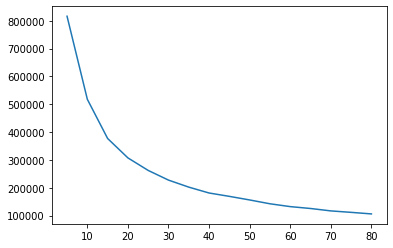

In [6]:
df_k_means['inertia'].plot()

<AxesSubplot:>

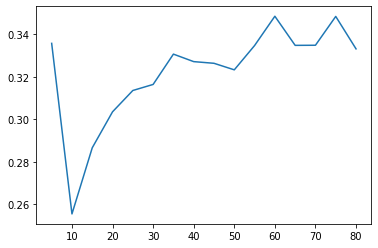

In [7]:
df_k_means['Silhuette'].plot()

<AxesSubplot:>

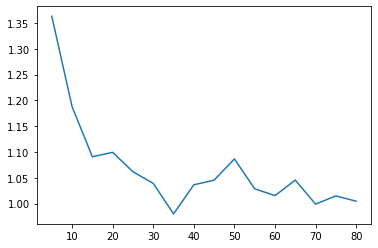

In [8]:
df_k_means['DB score'].plot()

In [9]:
kmeans = KMeans(n_clusters=35, init='k-means++',random_state=0).fit(X)
predicted_labels = kmeans.labels_
db = DB_score(X, predicted_labels)
s = s_score(X, predicted_labels)
i = kmeans.inertia_
print('Silhuette ', s, '\nDB ',db, '\nInertia ', i)

Silhuette  0.3305992266383243 
DB  0.9800912980376406 
Inertia  202188.1909396631


In [10]:
for i in np.unique(predicted_labels):
    print(f'class {i}, size of the class is {(predicted_labels==i).sum()}')
for i in np.unique(predicted_labels):
    print(f'\nclass {i}, size of the class is {(predicted_labels==i).sum()}')
    print(df[predicted_labels==i][['title', 'url']].head())

class 0, size of the class is 844
class 1, size of the class is 188
class 2, size of the class is 252
class 3, size of the class is 55
class 4, size of the class is 333
class 5, size of the class is 997
class 6, size of the class is 365
class 7, size of the class is 57
class 8, size of the class is 8
class 9, size of the class is 66
class 10, size of the class is 51
class 11, size of the class is 1128
class 12, size of the class is 141
class 13, size of the class is 77
class 14, size of the class is 155
class 15, size of the class is 387
class 16, size of the class is 559
class 17, size of the class is 112
class 18, size of the class is 136
class 19, size of the class is 503
class 20, size of the class is 44
class 21, size of the class is 348
class 22, size of the class is 45
class 23, size of the class is 289
class 24, size of the class is 176
class 25, size of the class is 1
class 26, size of the class is 192
class 27, size of the class is 29
class 28, size of the class is 123
class 

In [11]:
from sklearn.cluster import MeanShift

clustering = MeanShift(n_jobs=-1, cluster_all=False, bin_seeding=True, min_bin_freq=10).fit(X)
predicted_labels = clustering.labels_
db = DB_score(X, predicted_labels)
s = s_score(X, predicted_labels)
print('Silhuette ', s, '\nDB ',db)

Silhuette  0.4440679587555873 
DB  1.0309766302614052


In [12]:
for i in np.unique(predicted_labels):
    print(f'class {i}, size of the class is {(predicted_labels==i).sum()}')
#     print(df[predicted_labels==i][['title', 'url']].head())

class -1, size of the class is 1844
class 0, size of the class is 7604
class 1, size of the class is 188
class 2, size of the class is 144
class 3, size of the class is 97
class 4, size of the class is 57
class 5, size of the class is 51
class 6, size of the class is 15


# probabilistic

In [13]:
from sklearn.mixture import GaussianMixture

gauss = GaussianMixture(n_components=10).fit(X)
predicted_labels = gauss.predict(X)
db = DB_score(X, predicted_labels)
s = s_score(X, predicted_labels)
print('Silhuette ', s, '\nDB ',db)

Silhuette  0.09216798140448754 
DB  1.8070860653090233


In [14]:
for i in np.unique(predicted_labels):
    print(f'class {i}, size of the class is {(predicted_labels==i).sum()}')
#     print(df[predicted_labels==i][['title', 'url']].head())

class 0, size of the class is 2511
class 1, size of the class is 188
class 2, size of the class is 980
class 3, size of the class is 1099
class 4, size of the class is 302
class 5, size of the class is 817
class 6, size of the class is 1128
class 7, size of the class is 1997
class 8, size of the class is 824
class 9, size of the class is 154


# density based

In [15]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(min_samples=10, n_jobs=-1, eps=3).fit(X)
predicted_labels = clustering.labels_
db = DB_score(X, predicted_labels)
s = s_score(X, predicted_labels)
print('Silhuette ', s, '\nDB ',db)

Silhuette  0.03531738781389142 
DB  1.0845719205021571


In [16]:
for i in np.unique(predicted_labels):
    print(f'class {i}, size of the class is {(predicted_labels==i).sum()}')
#     print(df[predicted_labels==i][['title', 'url']].head())

class -1, size of the class is 1105
class 0, size of the class is 223
class 1, size of the class is 7117
class 2, size of the class is 37
class 3, size of the class is 15
class 4, size of the class is 56
class 5, size of the class is 134
class 6, size of the class is 44
class 7, size of the class is 121
class 8, size of the class is 57
class 9, size of the class is 182
class 10, size of the class is 17
class 11, size of the class is 29
class 12, size of the class is 18
class 13, size of the class is 188
class 14, size of the class is 105
class 15, size of the class is 18
class 16, size of the class is 21
class 17, size of the class is 20
class 18, size of the class is 36
class 19, size of the class is 11
class 20, size of the class is 12
class 21, size of the class is 13
class 22, size of the class is 24
class 23, size of the class is 16
class 24, size of the class is 12
class 25, size of the class is 13
class 26, size of the class is 24
class 27, size of the class is 30
class 28, size